In [50]:
# Import required libraries
import numpy as np
from dwdynamics.instance import Instance, Objective
from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.inspector import show
from dwdynamics import ComplexDynamicsProblem
import qutip as qp
import scipy as sp
import matplotlib.pyplot as plt

In [27]:
# Create a specific instance (e.g., instance_id=1, precision=3, number_time_points=3)
inst = Instance(instance_id=1)
inst.create_instance(precision=2, number_time_points=1)

# Retrieve and manipulate the clock
problem = inst.problem
clock = problem.get_clock()


    


clock
print(clock.shape)
# Set the modified clock back to the problem
problem_mod = problem.set_clock(clock)
inst.problem = problem_mod
inst.qubo = inst.problem.qubo(objective=inst.objective)
print(inst.qubo.num_interactions)


(2, 2)
4


In [28]:

# Run the QUBO on the D-Wave sampler
sampler = EmbeddingComposite(DWaveSampler(solver="Advantage_system6.4"))
#sampleset = sampler.sample(inst.qubo, num_reads=1, annealing_time=1,return_embedding=True)

# Display the sampleset using dwave-inspector
#show(sampleset)

In [29]:
import numpy as np

U = np.array([
    [0,             0.5+0.5j,  0.5-0.5j,  0],
    [0.5-0.5j,      0,         0,         0.5+0.5j],
    [0.5+0.5j,      0,         0,        -0.5+0.5j],
    [0,             0.5-0.5j, -0.5-0.5j,  0]
], dtype=complex)

# Vérifier hermitienne
is_hermitian = np.allclose(U, U.conj().T)

# Vérifier unitaire
is_unitary = np.allclose(U @ U.conj().T, np.eye(4))

print("Hermitienne :", is_hermitian)
print("Unitaire :", is_unitary)


Hermitienne : True
Unitaire : False


In [59]:
# Define the unitary matrix V
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
#V =1/np.sqrt(2)*np.kron(sigma_x,sigma_y)
V = 1/np.sqrt(2)*(sigma_y+sigma_z)
# Define the diagonal matrix D with eigenvalues (0.5, 1.0, 1.5, 2.0)
D = np.diag([0.25,0.5])

# Compute H = V D V†
#H = np.pi/2*sigma_y

H =np.pi/2* np.array([
    [-0.5+0.j,   -0.-0.5j,  0.+0.j,    0.5+0.5j],
    [-0.+0.5j,   0.5+0.j,   0.5+0.5j,  0.+0.j ],
    [ 0.-0.j,    0.5-0.5j, -0.5+0.j,  -0.-0.5j],
    [ 0.5-0.5j,  0.-0.j,  -0.+0.5j,   0.5+0.j ]
], dtype=complex)
#H = 2*np.pi*V @ D @ V.conj().T
eo =sp.linalg.expm(H*1.0j)
np.allclose(eo@eo.conj().T,np.eye(eo.shape[0]))
eo
#H = 1/np.sqrt(3) *(sigma_x+sigma_y+sigma_z)
eo

array([[ 0.00000000e+00-5.00000000e-01j,  5.00000000e-01+0.00000000e+00j,
         5.55111512e-17+0.00000000e+00j, -5.00000000e-01+5.00000000e-01j],
       [-5.00000000e-01-9.25185854e-18j,  0.00000000e+00+5.00000000e-01j,
        -5.00000000e-01+5.00000000e-01j,  2.77555756e-17-1.38777878e-17j],
       [-5.55111512e-17-2.77555756e-17j,  5.00000000e-01+5.00000000e-01j,
         2.22044605e-16-5.00000000e-01j,  5.00000000e-01-5.55111512e-17j],
       [ 5.00000000e-01+5.00000000e-01j,  4.31365603e-17+2.15682801e-17j,
        -5.00000000e-01-8.32667268e-17j,  0.00000000e+00+5.00000000e-01j]])

In [60]:
problem = ComplexDynamicsProblem(
    hamiltonian= H,      # Evolution under hamiltonian 0.5 * np.pi * sigma_y
    initial_state = np.array([1,0,0,0]),              # Starting at initial state |0>,
    times=tuple(range(2)),             # With six time points 0,1,2
    num_bits_per_var=3,
    
)
qubo =problem.qubo(objective=Objective.hessian)
problem.get_clock()
qubo.num_variables

[[ 0.00000000e+00+5.00000000e-01j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00-5.55111512e-17j  5.00000000e-01-5.00000000e-01j]
 [ 5.00000000e-01-9.25185854e-18j  0.00000000e+00-5.00000000e-01j
   5.00000000e-01-5.00000000e-01j  1.38777878e-17-2.77555756e-17j]
 [-2.77555756e-17-5.55111512e-17j -5.00000000e-01-5.00000000e-01j
   2.22044605e-16+5.00000000e-01j -5.00000000e-01-5.55111512e-17j]
 [-5.00000000e-01-5.00000000e-01j  2.15682801e-17+4.31365603e-17j
   5.00000000e-01-8.32667268e-17j  0.00000000e+00-5.00000000e-01j]]
[[ 0.00000000e+00+5.00000000e-01j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00-5.55111512e-17j  5.00000000e-01-5.00000000e-01j]
 [ 5.00000000e-01-9.25185854e-18j  0.00000000e+00-5.00000000e-01j
   5.00000000e-01-5.00000000e-01j  1.38777878e-17-2.77555756e-17j]
 [-2.77555756e-17-5.55111512e-17j -5.00000000e-01-5.00000000e-01j
   2.22044605e-16+5.00000000e-01j -5.00000000e-01-5.55111512e-17j]
 [-5.00000000e-01-5.00000000e-01j  2.15682801e-17+4.31365603e-17j
  

48

In [37]:
from dimod import ExactSolver

exact_solver = ExactSolver()

exact_result = exact_solver.sample(qubo)
exact_result.first.energy

np.float64(2.7755575615628914e-16)

In [89]:
#Run the QUBO on the D-Wave sampler
sampler = EmbeddingComposite(DWaveSampler(solver="Advantage_system6.4"))
sampleset = sampler.sample(qubo, num_reads=1000, annealing_time=200,return_embedding=True)

# Display the sampleset using dwave-inspector
show(sampleset)

Serving Inspector on http://127.0.0.1:18000/?problemId=59091bd4-7e95-4548-8a2d-a1e6521d6dc9

'http://127.0.0.1:18000/?problemId=59091bd4-7e95-4548-8a2d-a1e6521d6dc9'

In [74]:
problem.interpret_sample(sampleset.first.sample)

array([[ 1. +0.j ,  0.5+0.j ,  0. +0.j ,  0.5+0.j ],
       [ 0. +0.j ,  0. +0.j , -1. +0.5j, -0.5+0.5j]])

In [86]:
problem.hamiltonian

array([[-0.78539816+0.j        ,  0.        -0.78539816j,
         0.        +0.j        ,  0.78539816+0.78539816j],
       [ 0.        +0.78539816j,  0.78539816+0.j        ,
         0.78539816+0.78539816j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.78539816-0.78539816j,
        -0.78539816+0.j        ,  0.        -0.78539816j],
       [ 0.78539816-0.78539816j,  0.        +0.j        ,
         0.        +0.78539816j,  0.78539816+0.j        ]])

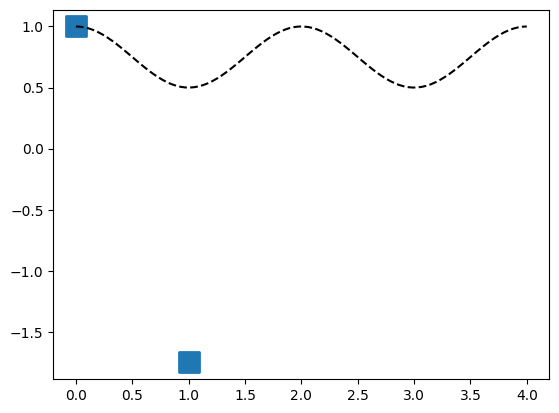

In [88]:
times = np.linspace(0, 4, 100)

dw_vec = problem.interpret_sample(sampleset.first.sample)
dw_expect = [(state.conj() @ np.kron(sigma_z,np.eye(2)) @ state).real for state in dw_vec]
H = qp.Qobj(np.array(problem.hamiltonian, dtype=complex), dims=[[2, 2], [2, 2]])
psi0 = qp.Qobj([1, 0, 0, 0], dims=[[2, 2], [1, 1]])
times = np.linspace(0, 4, 100)

zz = qp.tensor(qp.sigmaz(), qp.sigmaz())

result = qp.mesolve(H, psi0, times, e_ops=[zz])
baseline = result.expect[0]

plt.scatter([0,1], dw_expect, marker="s", lw=2, s=200, label="D-Wave sampler")
plt.plot(times, baseline, "k--", label="QuTiP (baseline)")